In [1]:
import numpy as np
import pandas as pd
dataframe_project = pd.read_csv(r'D:\Kartik Projects\Semester 5\Machine Learning\2023-09-12\Custom_CNN_Features.csv')
dataframe_project

,Filename,Label,f0,f1,f2,f3,f4,f5,f6,f7,...,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199
0,1.png,2,50.557468,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,316.271667,0.0,239.577011,277.834534,205.776398,0.0,0.0,0.0,0.0,91.438698
1,10.jpg.png,2,125.256027,0.0,0.0,0.0,0.0,0.0,48.989120,0,...,1317.333740,0.0,1000.075012,1118.496948,1030.366699,0.0,0.0,0.0,0.0,297.483124
2,10.png,2,50.160606,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,330.470978,0.0,251.886398,288.062134,220.889481,0.0,0.0,0.0,0.0,93.795654
3,100.png,2,63.720730,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,442.839233,0.0,345.145599,389.100678,304.433990,0.0,0.0,0.0,0.0,117.381721
4,10091.jpg,2,64.484604,0.0,0.0,0.0,0.0,0.0,37.368713,0,...,835.147400,0.0,649.643616,693.101868,690.640564,0.0,0.0,0.0,0.0,159.916016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,patch_84.jpg.png,2,283.005707,0.0,0.0,0.0,0.0,0.0,73.068192,0,...,2643.636230,0.0,2036.106934,2269.582275,1973.414917,0.0,0.0,0.0,0.0,657.907715
3249,patch_85.jpg.png,2,609.193603,0.0,0.0,0.0,0.0,0.0,131.018112,0,...,5950.206055,0.0,4727.840820,5170.731934,4594.757324,0.0,0.0,0.0,0.0,1362.733398
3250,patch_86.jpg.png,2,781.789490,0.0,0.0,0.0,0.0,0.0,174.997360,0,...,7535.423828,0.0,5972.883789,6563.629883,5749.376465,0.0,0.0,0.0,0.0,1758.735840
3251,patch_87.jpg.png,2,688.966675,0.0,0.0,0.0,0.0,0.0,206.603851,0,...,7119.000977,0.0,5575.274414,6160.208984,5423.260742,0.0,0.0,0.0,0.0,1670.340088


In [2]:
# Creating a table of the the new dataset
table = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}
dataframe_new = pd.DataFrame(table) # Uploading the new dataframe
dataframe_new

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [3]:
# Converting all categorical values into numerical values
from sklearn import preprocessing as prep

label_encoder = prep.LabelEncoder()

for column in dataframe_new.columns:
    dataframe_new[column] = label_encoder.fit_transform(dataframe_new[column])
dataframe_new

,age,income,student,credit_rating,buys_computer
0,1,0,0,1,0
1,1,0,0,0,0
2,0,0,0,1,1
3,2,2,0,1,1
4,2,1,1,1,1
5,2,1,1,0,0
6,0,1,1,0,1
7,1,2,0,1,0
8,1,1,1,1,1
9,2,2,1,1,1


In [4]:
# Seperate the data into input and output
input_data = dataframe_new.drop(columns=['buys_computer'])
output_data = dataframe_new['buys_computer']

# Splitting the data into testing and training data
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(input_data, output_data, test_size = 0.3)

In [5]:
# Question A1:
# Deciding which dataset is the root node for a decision tree
# Defining the entropy of the equation
def entropyData(data_field):
    class_label = data_field.unique()
    entropy = 0
    total_instances = len(data_field)
    for label in class_label:
        probability = len(data_field[data_field == label]) / total_instances
        entropy -= probability * np.log2(probability)
    return entropy

In [6]:
# Finding the attribute that can be used for making a decision tree
def information_gain(data_field, target):
    entropy_before_split = entropyData(target)
    total_instances = len(data_field)
    weighted_entropy_after_split = 0
    for value in data_field.unique():
        subset_indices = data_field[data_field == value].index
        subset_target = target[subset_indices]
        subset_instances = len(subset_indices)
        weighted_entropy_after_split += (subset_instances/total_instances) * entropyData(subset_target)
    information_gain_value = entropy_before_split - weighted_entropy_after_split
    return information_gain_value

In [7]:
# Calculate the information gain of all the features
features = input_data.columns
information_gain_values = {}
for feature in features:
    information_gain_values[feature] = information_gain(input_data[feature], output_data)
    print("The information gain for ", feature, " is: ", information_gain_values[feature], "\n")


The information gain for  age  is:  0.24674981977443933 

The information gain for  income  is:  0.02922256565895487 

The information gain for  student  is:  0.15183550136234159 

The information gain for  credit_rating  is:  0.04812703040826949 



In [8]:
# Finding the feature with the highest information gain
root_node = max(information_gain_values, key = information_gain_values.get)
print("Therefore the root node that we can use for our decision tree is: ", root_node)
# This is the root node that can be used to determine the decision tree

Therefore the root node that we can use for our decision tree is:  age


In [9]:
# Question A2:
# Creating a Decision Tree and finding the depth of the tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
decision_model = DecisionTreeClassifier()
decision_model.fit(train_input, train_output)
decision_tree_depth = decision_model.get_depth()
print("The depth of the decision tree is: ", decision_tree_depth)
decision_tree_prac = decision_model.score(test_input, test_output)
print("The decision tree accuracy of the dataframe is: ", decision_tree_prac, "\n")

The depth of the decision tree is:  3
The decision tree accuracy of the dataframe is:  0.4 



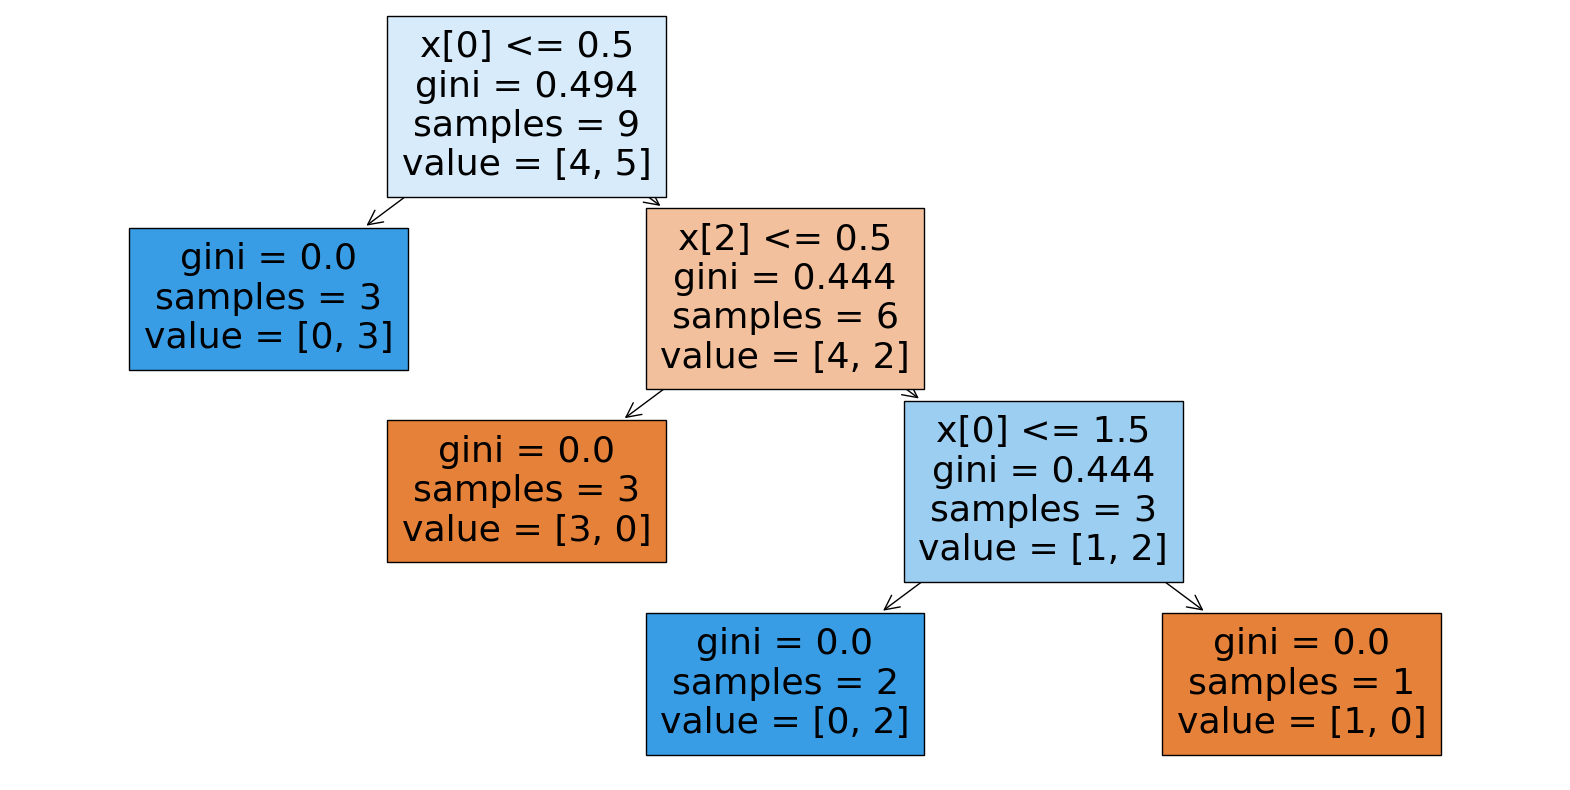

In [10]:
# Question A3:
# Visualize the constructed decision tree
from matplotlib import pyplot as plt
plt.figure(figsize = (20, 10))
plot_tree(decision_model, filled=True)
plt.show()

In [11]:
# Question A4:
# Applying the decision tree on the project data
# Normalization of the project dataset
scaler = prep.StandardScaler()
scaled_columns = dataframe_project.columns[2:] # Features excluding the filename and output label
data_copy = dataframe_project
scaled_df = scaler.fit_transform(data_copy[scaled_columns])
scaled_df = pd.DataFrame(scaled_df, columns = scaled_columns)
for i in scaled_columns:
    dataframe_project[i] = scaled_df[i]
dataframe_project # Normalized dataset
input_data_pro = dataframe_project.drop(columns=['Label', 'Filename'])
output_data_pro = dataframe_project['Label']

In [12]:
# Applying the entropy on the project data
input_pro_data_train, input_pro_data_test, output_pro_data_train, output_pro_data_test = train_test_split(input_data_pro, output_data_pro, test_size=0.3, random_state=42)
features = input_data_pro.columns
information_gain_values_pro = {}
for feature in features:
    information_gain_values_pro[feature] = information_gain(input_data_pro[feature], output_data_pro)
    print("The information gain for ", feature, " is: ", information_gain_values_pro[feature], "\n")

The information gain for  f0  is:  0.592476619985736 

The information gain for  f1  is:  0.8038732789393834 

The information gain for  f2  is:  1.342318345797245 

The information gain for  f3  is:  1.4583667956202633 

The information gain for  f4  is:  0.7626149932538396 

The information gain for  f5  is:  1.4583981154105756 

The information gain for  f6  is:  0.7514083236153255 

The information gain for  f7  is:  0.0 

The information gain for  f8  is:  0.6632644118944824 

The information gain for  f9  is:  0.766147081604905 

The information gain for  f10  is:  0.7028828118806151 

The information gain for  f11  is:  1.2709276654290749 

The information gain for  f12  is:  0.0013881891761922116 

The information gain for  f13  is:  1.4583795583558334 

The information gain for  f14  is:  0.0 

The information gain for  f15  is:  1.412901943406286 

The information gain for  f16  is:  0.9464700236117931 

The information gain for  f17  is:  0.8495108982819283 

The information

In [13]:
# Finally choosing the root node of the decision model
root_node_project = max(information_gain_values_pro, key = information_gain_values_pro.get)
print("The final project root node is: ", root_node_project)

The final project root node is:  f189


The depth of the decision tree is:  18
The decision tree accuracy of the dataframe is:  0.8995901639344263 



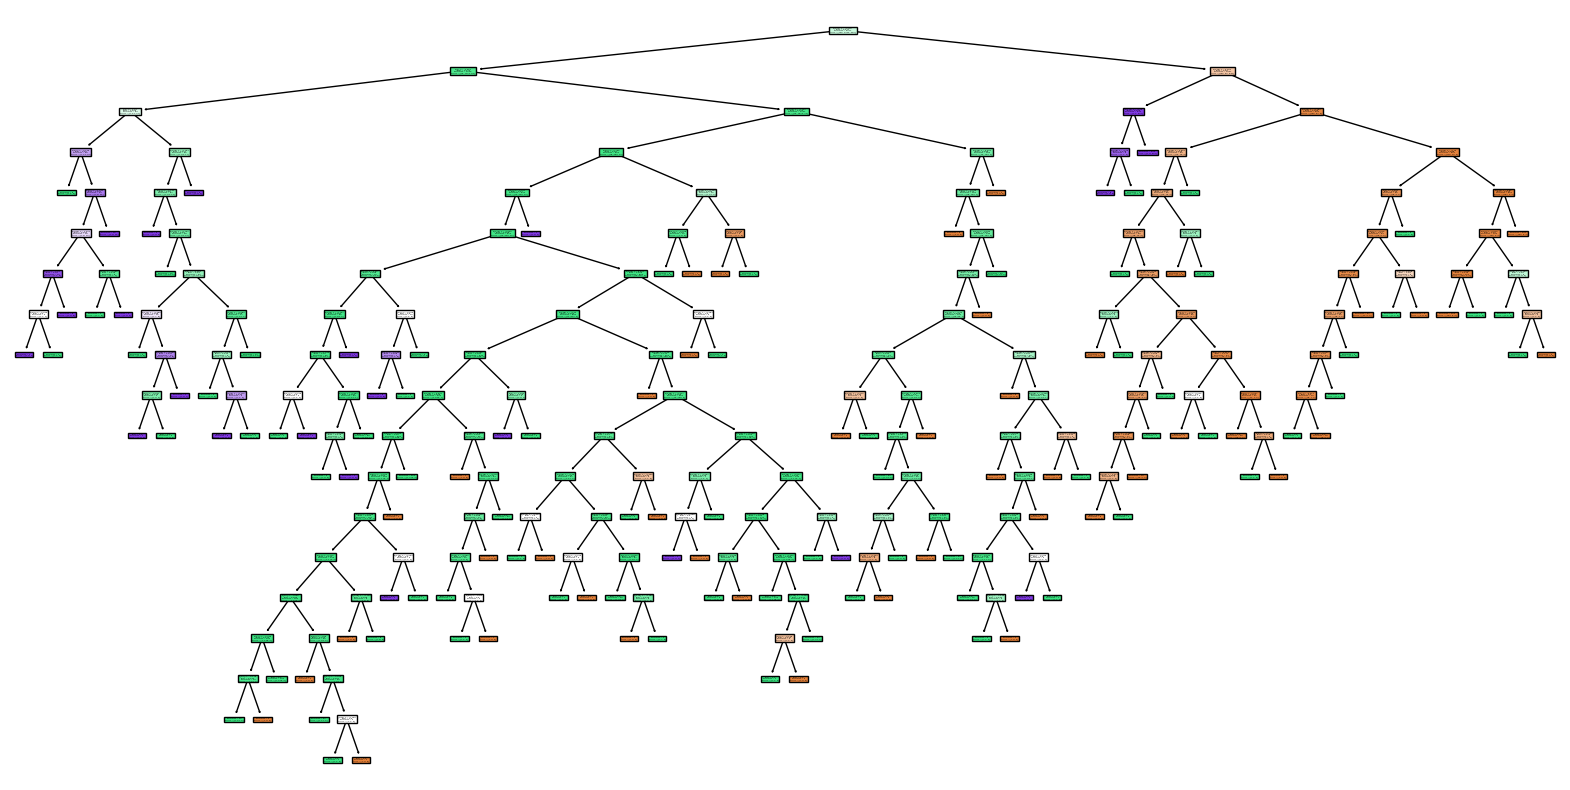

In [14]:
# Decision tree creation for project data
decision_model_pro = DecisionTreeClassifier()
decision_model_pro.fit(input_pro_data_train, output_pro_data_train)
decision_tree_depth_pro = decision_model_pro.get_depth()
print("The depth of the decision tree is: ", decision_tree_depth_pro)
decision_tree_acc = decision_model_pro.score(input_pro_data_test, output_pro_data_test)
print("The decision tree accuracy of the dataframe is: ", decision_tree_acc, "\n")
plt.figure(figsize = (20, 10))
plot_tree(decision_model_pro, filled=True)
plt.show()

The depth of the decision tree is:  7
The decision tree accuracy of the dataframe is:  0.9262295081967213 



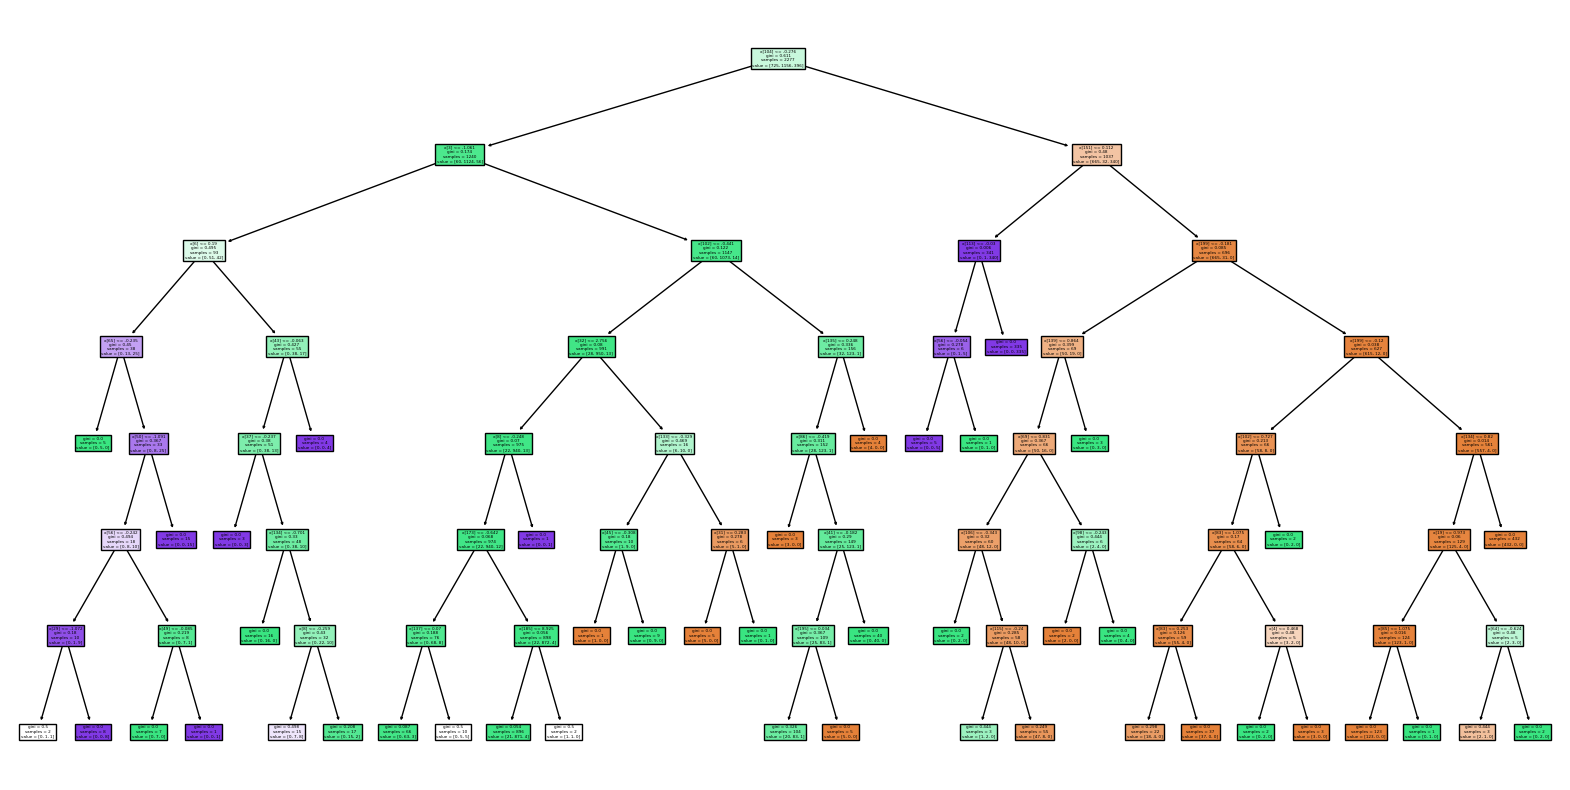

In [16]:
# Construct a decision tree with a maximum depth constraint
decision_model_pro_dep = DecisionTreeClassifier(max_depth = 7)
decision_model_pro_dep.fit(input_pro_data_train, output_pro_data_train)
decision_tree_depth_pro_dep = decision_model_pro_dep.get_depth()
print("The depth of the decision tree is: ", decision_tree_depth_pro_dep)
decision_tree_acc_dep = decision_model_pro_dep.score(input_pro_data_test, output_pro_data_test)
print("The decision tree accuracy of the dataframe is: ", decision_tree_acc_dep, "\n")
plt.figure(figsize = (20, 10))
plot_tree(decision_model_pro_dep, filled=True)
plt.show()